Develop/Train A Convolutional Neural Netwok For MNIST Dataset
====


### Load the dataset

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets('/tmp/data', one_hot=True)


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


/home/vahid/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


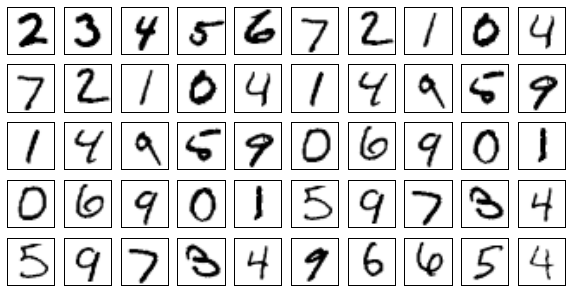

In [2]:
## Visualize a sample subset of data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

fig,ax = plt.subplots(5,10,figsize=(10,5))
for i in range(5):
    for j in range(10):
        index = (i-1)*5 + j
        ax[i][j].imshow(np.reshape(1-mnist_data.test.images[index],(28,28)), cmap='Greys_r')
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
fig.show()


### Set Network and Learning Parameters

### Define Auxilary Functions

In [3]:
### Function for initializing weights
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

### Function for initializing biases
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

### Function for 2-D Convolution
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

### Function for MaxPooling(2x )
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                           strides=[1, 2, 2, 1], padding='SAME')



### Define layers

![](figs/convolution-neural-network-arch.png)

In [4]:
## place-holders for input samples/labels
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

## Reshape input:
#### --> reshape input to a 4-D tensor (-1,28,28,1) 
x_image = tf.reshape(x, [-1,28,28,1])

#~~~~~~~~~~~~~~~~~~~~~~~~ 1st layer ~~~~~~~~~~~~~~~~~~~~~~~~~~#
## 1st convolutional layer: convolution filter shape (5,5,1,32)
#### --> input channels: 1
#### --> each filter size: (5x5)
#### --> output: 32 channels
W_conv1 = weight_variable(shape=[5, 5, 1, 32])
b_conv1 = bias_variable([32])
### Apply convolution, non-linear activation, and max-ppoling
h_conv1 = conv2d(x_image, W_conv1) + b_conv1
h_relu1 = tf.nn.relu(h_conv1)
h_pool1 = max_pool_2x2(h_relu1)

#~~~~~~~~~~~~~~~~~~~~~~~~ 2nd layer ~~~~~~~~~~~~~~~~~~~~~~~~~~#
## 2nd convolutional layer: convolution filter shape (5,5,32,64)
#### --> input channels: 32
#### --> each filter size: (5x5)
#### --> output: 64 channels
W_conv2 = weight_variable(shape=[5, 5, 32, 64])
b_conv2 = bias_variable([64])
### Apply convolution, non-linear activation, and max-ppoling
h_conv2 = conv2d(h_pool1, W_conv2) + b_conv2
h_relu2 = tf.nn.relu(h_conv2)
h_pool2 = max_pool_2x2(h_relu2)

#~~~~~~~~~~~~~~~~~~~~~~~~ 3rd layer ~~~~~~~~~~~~~~~~~~~~~~~~~~#
## 3rd Layer: Fully-Connected 
W_fc3 = weight_variable([7 * 7 * 64, 1024])
b_fc3 = bias_variable([1024])
### Apply fully connected layer
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc3 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc3) + b_fc3)
## drop-out: placeholder for 
##  probability of dropoout in fully connected layer
keep_prob = tf.placeholder(tf.float32)
h_fc3_drop = tf.nn.dropout(h_fc3, keep_prob)

#~~~~~~~~~~~~~~~~~~~~~~ ReadOut layer ~~~~~~~~~~~~~~~~~~~~~~~#
W_fc4 = weight_variable([1024, 10])
b_fc4 = bias_variable([10])
### Apply fully connected layer
y_pred = tf.matmul(h_fc3_drop, W_fc4) + b_fc4


In [5]:
cross_entropy_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_pred, y_))

optimizer = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy_loss)

label_pred = tf.argmax(y_pred,1)

correct_prediction = tf.equal(label_pred, tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Tensorflow Session

step 00000, training accuracy 0.06
step 01000, training accuracy 0.94
step 02000, training accuracy 0.94
step 03000, training accuracy 0.98
step 04000, training accuracy 0.96
step 05000, training accuracy 0.98
step 06000, training accuracy 1.00
step 07000, training accuracy 0.98
step 08000, training accuracy 0.98
step 09000, training accuracy 1.00
step 10000, training accuracy 0.98
step 11000, training accuracy 1.00
step 12000, training accuracy 0.98
step 13000, training accuracy 1.00
step 14000, training accuracy 1.00
step 15000, training accuracy 1.00
step 16000, training accuracy 1.00
step 17000, training accuracy 1.00
step 18000, training accuracy 1.00
step 19000, training accuracy 1.00


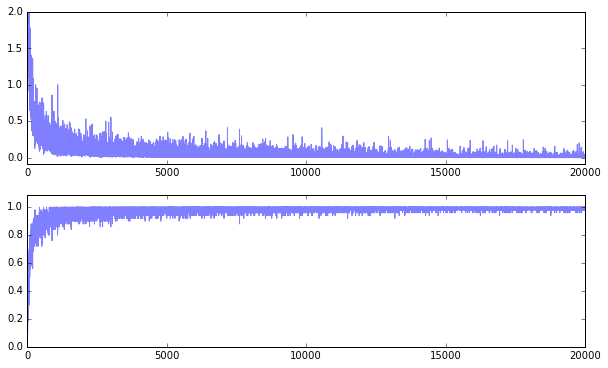

test accuracy 0.9925


In [6]:
init = tf.initialize_all_variables()

losses, trainaccs = [], []
sess = tf.Session()
with sess:
    sess.run(init)
    for i in range(20000):
        batch = mnist_data.train.next_batch(50)
        
            #train_accuracy = accuracy.eval(
            #    feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
            
        _, train_acc, loss = sess.run([optimizer, accuracy, cross_entropy_loss], 
                feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
        losses.append(loss)
        trainaccs.append(train_acc)
        if i%1000 == 0:
            print("step {:05d}, training accuracy {:.2f}".format(i, train_acc))

    fig,ax = plt.subplots(2,1,figsize=(10,6))
    ax[0].plot(range(len(losses)), losses, alpha=0.5)
    ax[0].set_ylim((-0.09,2))
    ax[1].plot(range(len(trainaccs)), trainaccs, alpha=0.5)
    ax[1].set_ylim((0,1.09))
    plt.show()

    ### reporting test accuracy: 
    #print("test accuracy {:g}".format(accuracy.eval(
    #        feed_dict={x: mnist_data.test.images, 
    #                   y_: mnist_data.test.labels, keep_prob: 1.0})))
    ## predicting all test values at once failed on my laptop
    ## splitting the test dataset:
    test_splits = np.split(np.arange(mnist_data.test.images.shape[0]), 20)
    test_preds = np.zeros(mnist_data.test.images.shape[0])
    for indx in test_splits:
        y_test = sess.run(label_pred, 
                          feed_dict={x:mnist_data.test.images[indx], keep_prob:1.0})
        test_preds[indx] = y_test
        
    print("test accuracy {:g}".format(accuracy.eval(feed_dict={
                label_pred:test_preds, y_:mnist_data.test.labels
            })))

### Misclassified Examples

/home/vahid/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


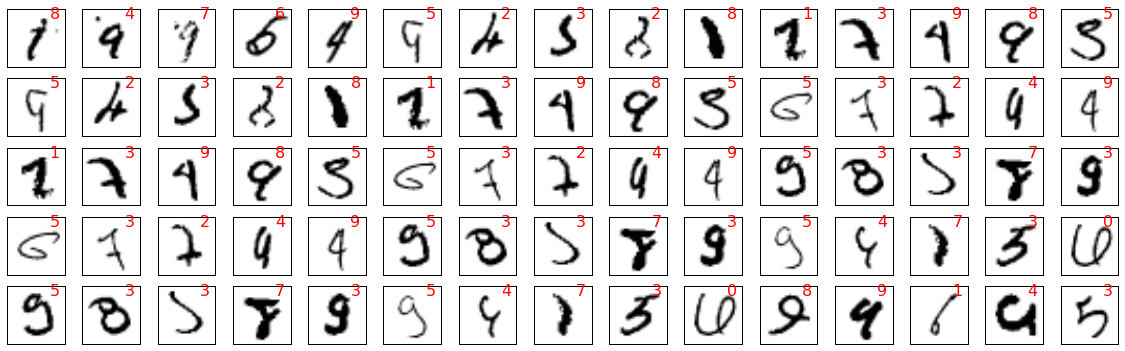

In [20]:
indx = np.where(test_preds != np.argmax(mnist_data.test.labels, axis=1))[0]

fig,ax = plt.subplots(5,15,figsize=(20,6))
for i in range(5):
    for j in range(15):
        k = (i-1)*5 + j
        ax[i][j].imshow(np.reshape(1-mnist_data.test.images[indx[k]],(28,28)), cmap='Greys_r')
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        ax[i][j].text(x=20, y=7, s="{:d}".format(int(test_preds[indx[k]])), 
                      color='red', fontsize=20)
fig.show()

In [15]:
15*5

75